# Projeto de Bloco - Teste de Performance 9 (TP9)

Instituto Infnet - Rafael Dottori de Oliveira

08/12/2023

===========================================================================================

## Enunciado

• A partir das atividades realizadas no TP5 e TP7, crie um modelo de regressão linear para sua base de dados escolhidas

• Avalie a qualidade do seu modelo através das métricas de MSE, RMSE e MAE

• Para dar visibilidade ao seu projeto, construa um dashboard usando a ferramenta Streamlit:
      – Selecione os plots relevantes da fase de análise exploratória
      – Mostre os dados antes e depois da análise de qualidade dados, destacando as melhorias
      – Mostre o resultado do modelo de regressão linear
      – Mostre as métricas calculadas de forma clara

• Publique o seu dashboard no Github e crie um link de acesso pelo streamlit.app

# Carregando os dados

(Link para a fonte de dados no Kaggle: https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot)

Primeiramente, importamos as bibliotecas que serão utilizadas.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Subimos o arquivo ".csv" para o campo de arquivos (Files) no menu lateral e criamos um DataFrame a partir dele.

In [ ]:
melb = pd.read_csv('melb_data.csv')

# Análise Exploratória

Vamos exibir os dados e explorar as variáveis presentes.

In [ ]:
melb

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [ ]:
melb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

Sabemos que o nosso modelo irá tentar prever os preços dos imóveis. Vamos verificar a distribuição dos mesmos.

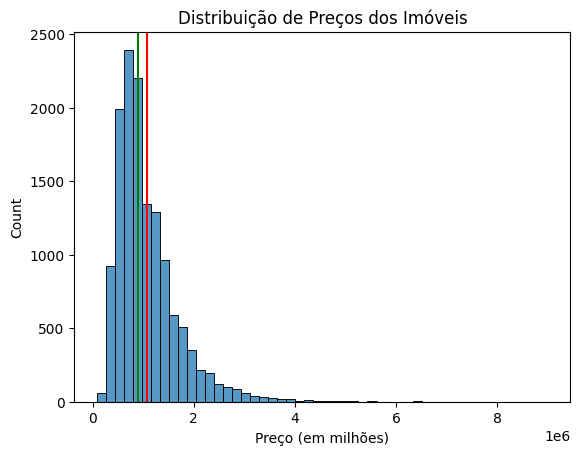

In [ ]:
sns.histplot(data=melb['Price'], bins=50)

plt.title('Distribuição de Preços dos Imóveis')
plt.xlabel('Preço (em milhões)')

# Linhas de média e mediana
plt.axvline(np.mean(melb['Price']), color='red')
plt.axvline(np.median(melb['Price']), color='green')

plt.show()

Daremos sequência as análises e começaremos a explorar variáveis específicas, suas relações e correções a serem feitas na fase de pré-processamento.

# Pré-processamento

## Valores duplicados ou redudantes

Podemos verificar se existem valores duplicados na base de dados.

In [ ]:
melb.duplicated().sum()

0

Além disso, temos duas colunas com o número de quartos em cada imóvel, obtidas em duas fontes diferentes.

Vamos comparar as observações para decidir se é necessário manter a segunda fonte.

In [ ]:
melb[['Rooms', 'Bedroom2']]

,Rooms,Bedroom2
0,2,2.0
1,2,2.0
2,3,3.0
3,3,3.0
4,4,3.0
...,...,...
13575,4,4.0
13576,3,3.0
13577,3,3.0
13578,4,4.0


In [ ]:
melb[['Rooms', 'Bedroom2']].corr()

,Rooms,Bedroom2
Rooms,1.00000,0.94419
Bedroom2,0.94419,1.00000


In [ ]:
linhas_iguais = melb.loc[(melb['Rooms'] == melb['Bedroom2'])].shape[0]
percentual = round((linhas_iguais / melb.shape[0]) * 100, 2)

linhas_iguais, percentual

(12904, 95.02)

Concluímos que podemos descartar ou ignorar a variável no modelo.

In [ ]:
melb.drop(['Bedroom2'], axis=1, inplace=True)

## Valores nulos

Verificamos quais colunas possuem valores nulos.

In [ ]:
melb.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

### Variável "Car"

Essa variável nos diz quantas vagas há na garagem do imóvel. Vamos checar os valores presentes na base de dados.

In [ ]:
melb['Car'].value_counts(dropna=False)

2.0     5591
1.0     5509
0.0     1026
3.0      748
4.0      506
5.0       63
NaN       62
6.0       54
8.0        9
7.0        8
10.0       3
9.0        1
Name: Car, dtype: int64

Aqui temos duas possibilidades: podemos supôr que os valores faltantes deveriam indicar que o imóvel não possui nenhuma vaga e preenchê-los com 0.

Também podemos usar a mediana, sabendo que a maioria das casas possui 2 vagas, e sabendo também que usar a média provavelmente nos traria um número fracionário, o que não faz sentido para contar as vagas.

Usaremos o primeiro método.

In [ ]:
melb['Car'].fillna(value=0, inplace=True)

In [ ]:
# melb['Car'].fillna(value=melb['Car'].median(), inplace=True)

### Variável "CouncilArea"

Ao explorar a segunda variável com valores faltantes, percebemos que existe a possibilidade de não informar a área ("unavailable"). Ocupamos os dados faltantes com essa opção, sem precisar descartar tantas linhas ou a coluna inteira.

In [ ]:
melb['CouncilArea'].value_counts(dropna=False)

NaN                  1369
Moreland             1163
Boroondara           1160
Moonee Valley         997
Darebin               934
Glen Eira             848
Stonnington           719
Maribyrnong           692
Yarra                 647
Port Phillip          628
Banyule               594
Bayside               489
Melbourne             470
Hobsons Bay           434
Brimbank              424
Monash                333
Manningham            311
Whitehorse            304
Kingston              207
Whittlesea            167
Hume                  164
Wyndham                86
Knox                   80
Maroondah              80
Melton                 66
Frankston              53
Greater Dandenong      52
Casey                  38
Nillumbik              36
Yarra Ranges           18
Cardinia                8
Macedon Ranges          7
Moorabool               1
Unavailable             1
Name: CouncilArea, dtype: int64

In [ ]:
melb['CouncilArea'].fillna(value='Unavailable', inplace=True)

### Demais variáveis

Por ora descartamos todas as linhas com valores nulos para "YearBuilt" e "BuildingArea".

Intuitivamente vamos supor que a área do imóvel e o ano de construção terão relação com o preço (ou pelo menos um valor percebido) da moradia, portanto não queremos descartar as colunas inteiramente, mesmo que a quantidade de linhas com valores faltantes seja alta.

In [ ]:
melb.dropna(inplace=True)

## Datas

Apesar de não usarmos datas no nosso modelo já que contamos com a variável "YearBuilt", podemos convertê-las corretamente para o tipo "Datetime" caso precisemos incluir as datas ao montar visualizações.

In [ ]:
melb['Date'] = pd.to_datetime(melb['Date'])

Também convertemos o tipo dos anos de construção para números inteiros, já que não há necessidade de interpretar um ano "fracionado".

In [ ]:
melb = melb.astype({'YearBuilt': 'int32'})

## Outliers

Exibimos as estatísticas básicas das nossas variáveis numéricas, observando principalmente o desvio padrão e as diferenças entre os valores mínimos e máximos.

In [ ]:
melb.describe()

,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,6858.000000,6.858000e+03,6858.000000,6858.000000,6858.000000,6858.000000,6858.000000,6858.000000,6858.000000,6858.000000,6858.000000,6858.000000
mean,2.976378,1.078946e+06,10.122951,3104.312482,1.592884,1.600321,487.784777,143.325069,1964.210849,-37.808058,144.991798,7433.755176
std,0.969731,6.731480e+05,5.993778,91.123131,0.713761,0.948236,915.515969,89.821515,37.860815,0.079908,0.104803,4349.920180
min,1.000000,1.310000e+05,0.000000,3000.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,-38.164920,144.542370,389.000000
25%,2.000000,6.300000e+05,6.100000,3044.000000,1.000000,1.000000,166.000000,93.000000,1940.000000,-37.856675,144.925600,4385.000000
50%,3.000000,8.922500e+05,9.200000,3083.000000,1.000000,2.000000,402.000000,126.000000,1970.000000,-37.802200,144.996800,6567.000000
75%,4.000000,1.335000e+06,13.000000,3148.000000,2.000000,2.000000,640.000000,172.750000,2000.000000,-37.757025,145.055975,10175.000000
max,8.000000,9.000000e+06,47.400000,3977.000000,8.000000,10.000000,37000.000000,3112.000000,2018.000000,-37.408530,145.526350,21650.000000


Dentre as colunas observadas, a variável com a área total dos terrenos nos chama atenção.

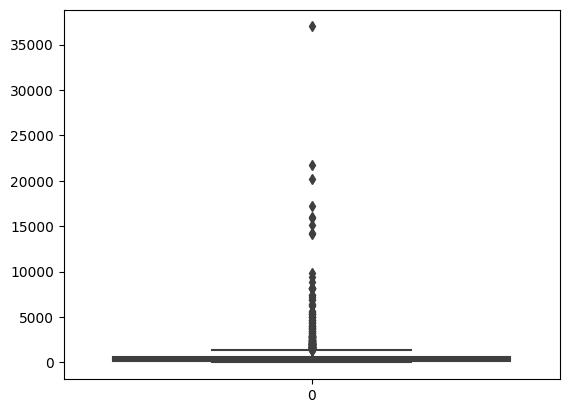

In [ ]:
sns.boxplot(data=melb['Landsize'].values)

plt.show()

Olhando o gráfico, percebemos que existem muitos valores acima do limite superior e alguns específicos que estão MUITO além deste.

Calculamos os quartis e os limites da distribuição de "Landsize".

In [ ]:
Q1 = melb['Landsize'].quantile(0.25)
Q3 = melb['Landsize'].quantile(0.75)
IQR = (Q3 - Q1) * 1.5
limite_inferior = - (Q1 - IQR)
limite_superior = Q3 + IQR

limite_inferior, limite_superior

(545.0, 1351.0)

Com esses valores estipulados e observando o bloxplot, podemos verificar quantos valores exatamente estão pouco ou muito acima do limite superior.

In [ ]:
melb[melb['Landsize'] > 1350].shape[0]

171

In [ ]:
melb[melb['Landsize'] > 10_000].shape[0]

9

Considerando o número de valores acima de 10.000 e a distância deles para os demais, decidimos descartá-los.

In [ ]:
melb = melb[melb['Landsize'] < 10_000]

Ao refazer a visualização, ainda enxergamos que existem valores acima do limite superior.

Mas pela distribuição e distância dos mesmos, levantamos uma hipótese de que a natureza do negócio explique essas observações.

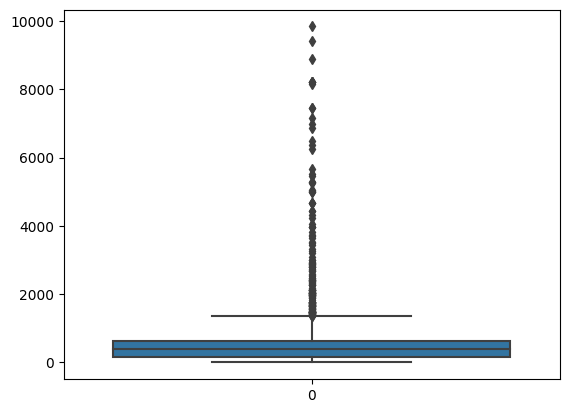

In [ ]:
sns.boxplot(data=melb['Landsize'].values)

plt.show()

## Outros problemas na base

Ainda explorando estatísticas básicas da função "describe", notamos que algumas variáveis possuem valores iguais a zero. Buscamos saber se esses dados fazem sentido dentro da visão de negócio.

In [ ]:
melb.describe()

,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,6849.000000,6.849000e+03,6849.000000,6849.000000,6849.000000,6849.000000,6849.000000,6849.000000,6849.000000,6849.000000,6849.000000,6849.000000
mean,2.977369,1.079487e+06,10.125069,3104.278873,1.592787,1.600672,463.370273,143.388936,1964.176668,-37.808104,144.991892,7433.127172
std,0.969715,6.733755e+05,5.977770,91.067945,0.713816,0.948655,569.553498,89.854214,37.846619,0.079868,0.104757,4348.506836
min,1.000000,1.310000e+05,0.000000,3000.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,-38.164920,144.542370,389.000000
25%,2.000000,6.300000e+05,6.100000,3044.000000,1.000000,1.000000,165.000000,93.000000,1940.000000,-37.856790,144.925600,4385.000000
50%,3.000000,8.940000e+05,9.200000,3083.000000,1.000000,2.000000,402.000000,126.000000,1970.000000,-37.802200,144.996810,6567.000000
75%,4.000000,1.337000e+06,13.000000,3148.000000,2.000000,2.000000,640.000000,173.000000,2000.000000,-37.757000,145.056000,10175.000000
max,8.000000,9.000000e+06,47.400000,3977.000000,8.000000,10.000000,9838.000000,3112.000000,2018.000000,-37.408530,145.526350,21650.000000


Primeiro temos imóveis com distância 0 do centro da cidade.

In [ ]:
melb[['Distance', 'Suburb', 'Address', 'Regionname']][melb['Distance'] == 0]

,Distance,Suburb,Address,Regionname
9620,0.0,Melbourne,19/300 King St,Northern Metropolitan
10393,0.0,Melbourne,1814/250 Elizabeth St,Northern Metropolitan
11428,0.0,Melbourne,806/22 Coromandel Pl,Northern Metropolitan
12073,0.0,Melbourne,709/87 Franklin St,Northern Metropolitan


Ao localizar e ler um pouco mais sobre os bairros, endereços e regiões, concluímos que esses imóveis já estão na própria região central, e é por isso que a distância está registrada como zero.

Já para a área do imóvel em si, não encontramos nenhuma hipótese que explique uma construção com 2 ou mais quartos e com as medidas iguais a 0. Como temos apenas 17 linhas dentro desse caso, optamos por descartá-las também.

In [ ]:
melb[melb['BuildingArea'] == 0]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
4344,North Melbourne,19 Shands La,2,t,841000.0,S,Jellis,2017-04-03,2.3,3051.0,1.0,1.0,215.0,0.0,2000,Melbourne,-37.79530,144.94370,Northern Metropolitan,6821.0
12226,Balwyn North,14 Wanbrow Av,5,h,1950000.0,S,RT,2017-03-09,9.7,3104.0,3.0,2.0,743.0,0.0,1949,Unavailable,-37.80235,145.09311,Southern Metropolitan,7809.0
12249,Bundoora,22 Moreton Cr,3,h,814000.0,S,Barry,2017-03-09,12.1,3083.0,1.0,2.0,542.0,0.0,1970,Unavailable,-37.70861,145.05691,Northern Metropolitan,10175.0
12395,Roxburgh Park,16 Sandover Dr,4,h,570000.0,S,Raine,2017-03-09,20.6,3064.0,2.0,2.0,504.0,0.0,2000,Unavailable,-37.61419,144.93448,Northern Metropolitan,5833.0
12412,Thornbury,19/337 Station St,3,t,900000.0,VB,Jellis,2017-03-09,7.0,3071.0,2.0,2.0,120.0,0.0,2000,Unavailable,-37.76343,145.02096,Northern Metropolitan,8870.0
13040,Prahran,6 Aberdeen Rd,3,h,1390000.0,S,Marshall,2017-08-19,4.6,3181.0,2.0,1.0,125.0,0.0,2002,Unavailable,-37.85257,145.00296,Southern Metropolitan,7717.0
13207,Huntingdale,33 Beauford St,3,h,1205000.0,SA,FN,2017-09-23,12.3,3166.0,2.0,4.0,622.0,0.0,1960,Unavailable,-37.90823,145.10851,Southern Metropolitan,768.0
13348,Balwyn North,1 Hosken St,5,h,2800000.0,S,Marshall,2017-08-26,9.7,3104.0,2.0,2.0,1173.0,0.0,1960,Unavailable,-37.80385,145.09094,Southern Metropolitan,7809.0
13370,Brighton East,60 Cummins Rd,3,h,1650000.0,SP,Buxton,2017-08-26,10.3,3187.0,2.0,2.0,623.0,0.0,1920,Unavailable,-37.92698,145.02673,Southern Metropolitan,6938.0
13380,Bundoora,37 Greenwood Dr,4,h,815000.0,S,Ray,2017-08-26,12.1,3083.0,2.0,1.0,525.0,0.0,1965,Unavailable,-37.70765,145.05556,Northern Metropolitan,10175.0


In [ ]:
melb = melb[melb['BuildingArea'] > 0]

Por último, observamos que o primeiro ano registrado para a construção de um imóvel é 1196, o que não faria sentido por diversos motivos.

Um diagrama de dispersão nos mostra claramente a disparidade entre os anos documentados.

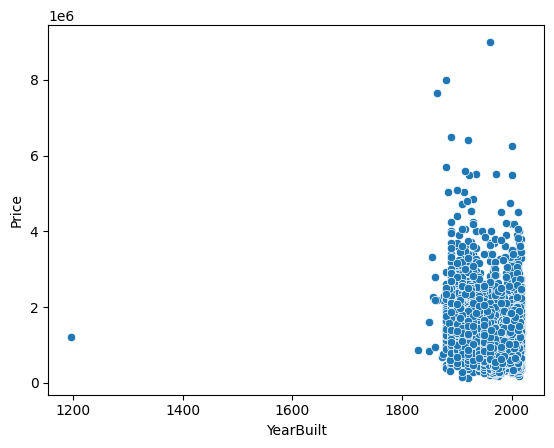

In [ ]:
sns.scatterplot(data=melb, x='YearBuilt', y='Price')
plt.show()

Confirmamos o valor discrepante e então o removemos.

In [ ]:
melb[melb['YearBuilt'] < 1800]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
9968,Mount Waverley,5 Armstrong St,3,h,1200000.0,VB,McGrath,2017-06-24,14.2,3149.0,1.0,4.0,807.0,117.0,1196,Monash,-37.86788,145.12121,Eastern Metropolitan,13366.0


In [ ]:
melb.drop(9968, inplace=True)

## LabelEncoder

Nos atentamos agora às variáveis categóricas. Criamos dois gráficos com as médias de preços e distribuição dos mesmos para as variáveis que queremos usar no modelo.

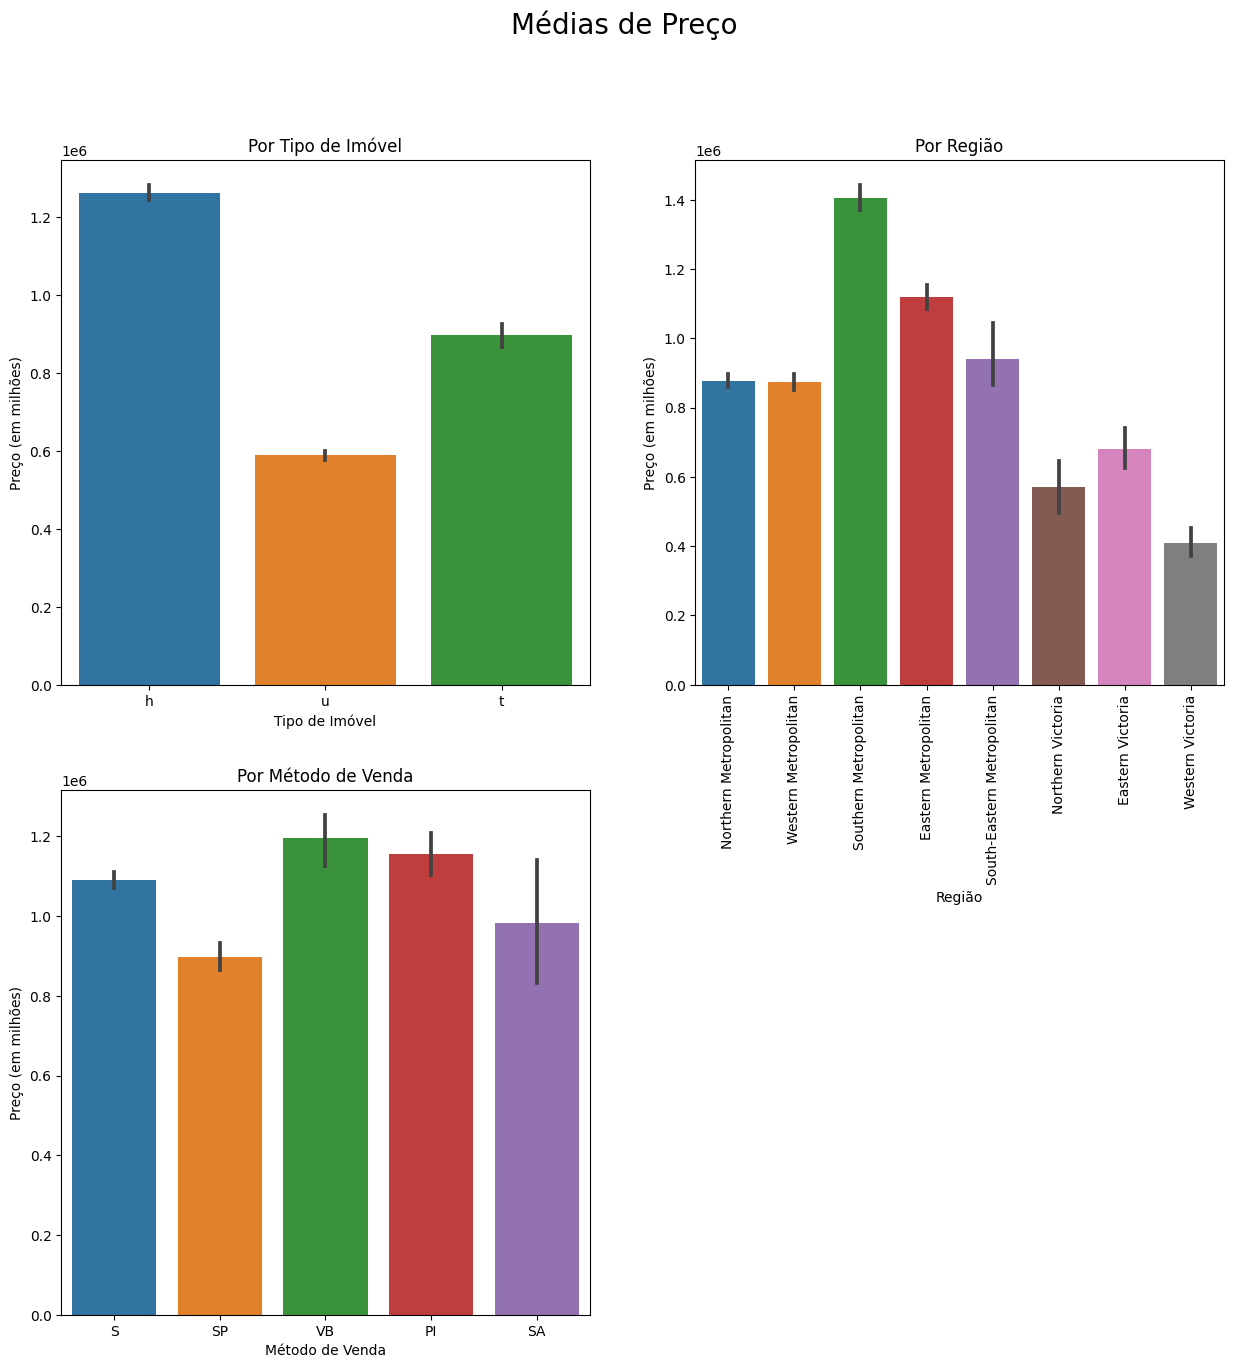

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15,15))

sns.barplot(data=melb, x='Type', y='Price', ax=axes[0,0])
axes[0,0].set_xlabel('Tipo de Imóvel')
axes[0,0].set_ylabel('Preço (em milhões)')
axes[0,0].set_title('Por Tipo de Imóvel')

sns.barplot(data=melb, x='Regionname', y='Price', ax=axes[0,1])
axes[0,1].set_xlabel('Região')
axes[0,1].set_ylabel('Preço (em milhões)')
axes[0,1].set_title('Por Região')
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=90)

sns.barplot(data=melb, x='Method', y='Price', ax=axes[1,0])
axes[1,0].set_xlabel('Método de Venda')
axes[1,0].set_ylabel('Preço (em milhões)')
axes[1,0].set_title('Por Método de Venda')


fig.delaxes(axes[1,1])
fig.suptitle('Médias de Preço', fontsize=20)
plt.show()

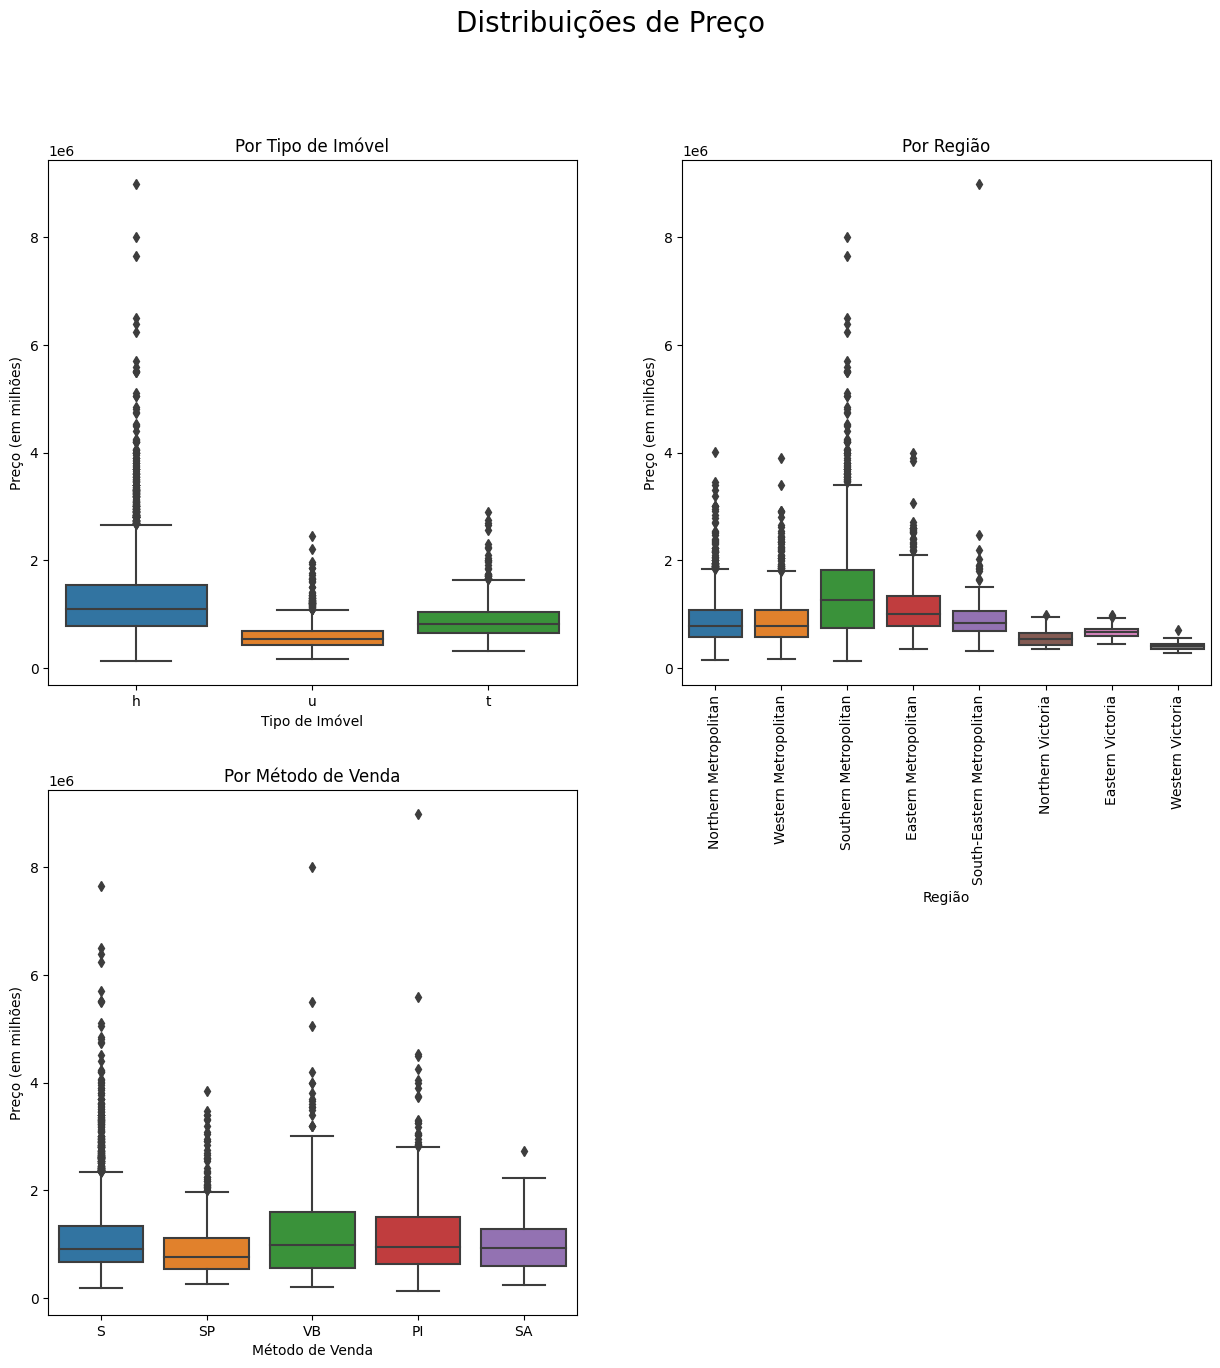

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15,15))

sns.boxplot(data=melb, x='Type', y='Price', ax=axes[0,0])
axes[0,0].set_xlabel('Tipo de Imóvel')
axes[0,0].set_ylabel('Preço (em milhões)')
axes[0,0].set_title('Por Tipo de Imóvel')

sns.boxplot(data=melb, x='Regionname', y='Price', ax=axes[0,1])
axes[0,1].set_xlabel('Região')
axes[0,1].set_ylabel('Preço (em milhões)')
axes[0,1].set_title('Por Região')
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=90)

sns.boxplot(data=melb, x='Method', y='Price', ax=axes[1,0])
axes[1,0].set_xlabel('Método de Venda')
axes[1,0].set_ylabel('Preço (em milhões)')
axes[1,0].set_title('Por Método de Venda')

fig.delaxes(axes[1,1])
fig.suptitle('Distribuições de Preço', fontsize=20)
plt.show()

Inicialmente, os gráficos nos indicam que essas colunas devem afetar sim os preços dos imóveis.

Porém, para serem encaixados no modelo de regressão linear, precisamos converter as variáveis para valores numéricos.

Usaremos o LabelEncoder para "mapear" cada uma dessas categorias em um índice numérico que possa ser utilizado nas previsões.

(Por exemplo, para o tipo de imóvel temos "h", "u" e "t". Transformaremos cada um desses respectivamente em "0", "1" ou "2")

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [ ]:
tipos = melb['Type'].unique()

le.fit(tipos)
melb['TypeIndex'] = le.transform(melb['Type'])

In [ ]:
regioes = melb['Regionname'].unique()

le.fit(regioes)
melb['RegionIndex'] = le.transform(melb['Regionname'])

In [ ]:
tipos = melb['Method'].unique()

le.fit(tipos)
melb['MethodIndex'] = le.transform(melb['Method'])

In [ ]:
melb['TypeIndex'].value_counts()

0    4671
2    1522
1     638
Name: TypeIndex, dtype: int64

# Retomando a Análise Exploratória com visualizações

Agora que eliminamos os valores nulos e consertamos eventuais problemas, podemos criar outros gráficos que nos permitam analisar a relação entre as variáveis escolhidas (features) e nossa variável alvo (target).

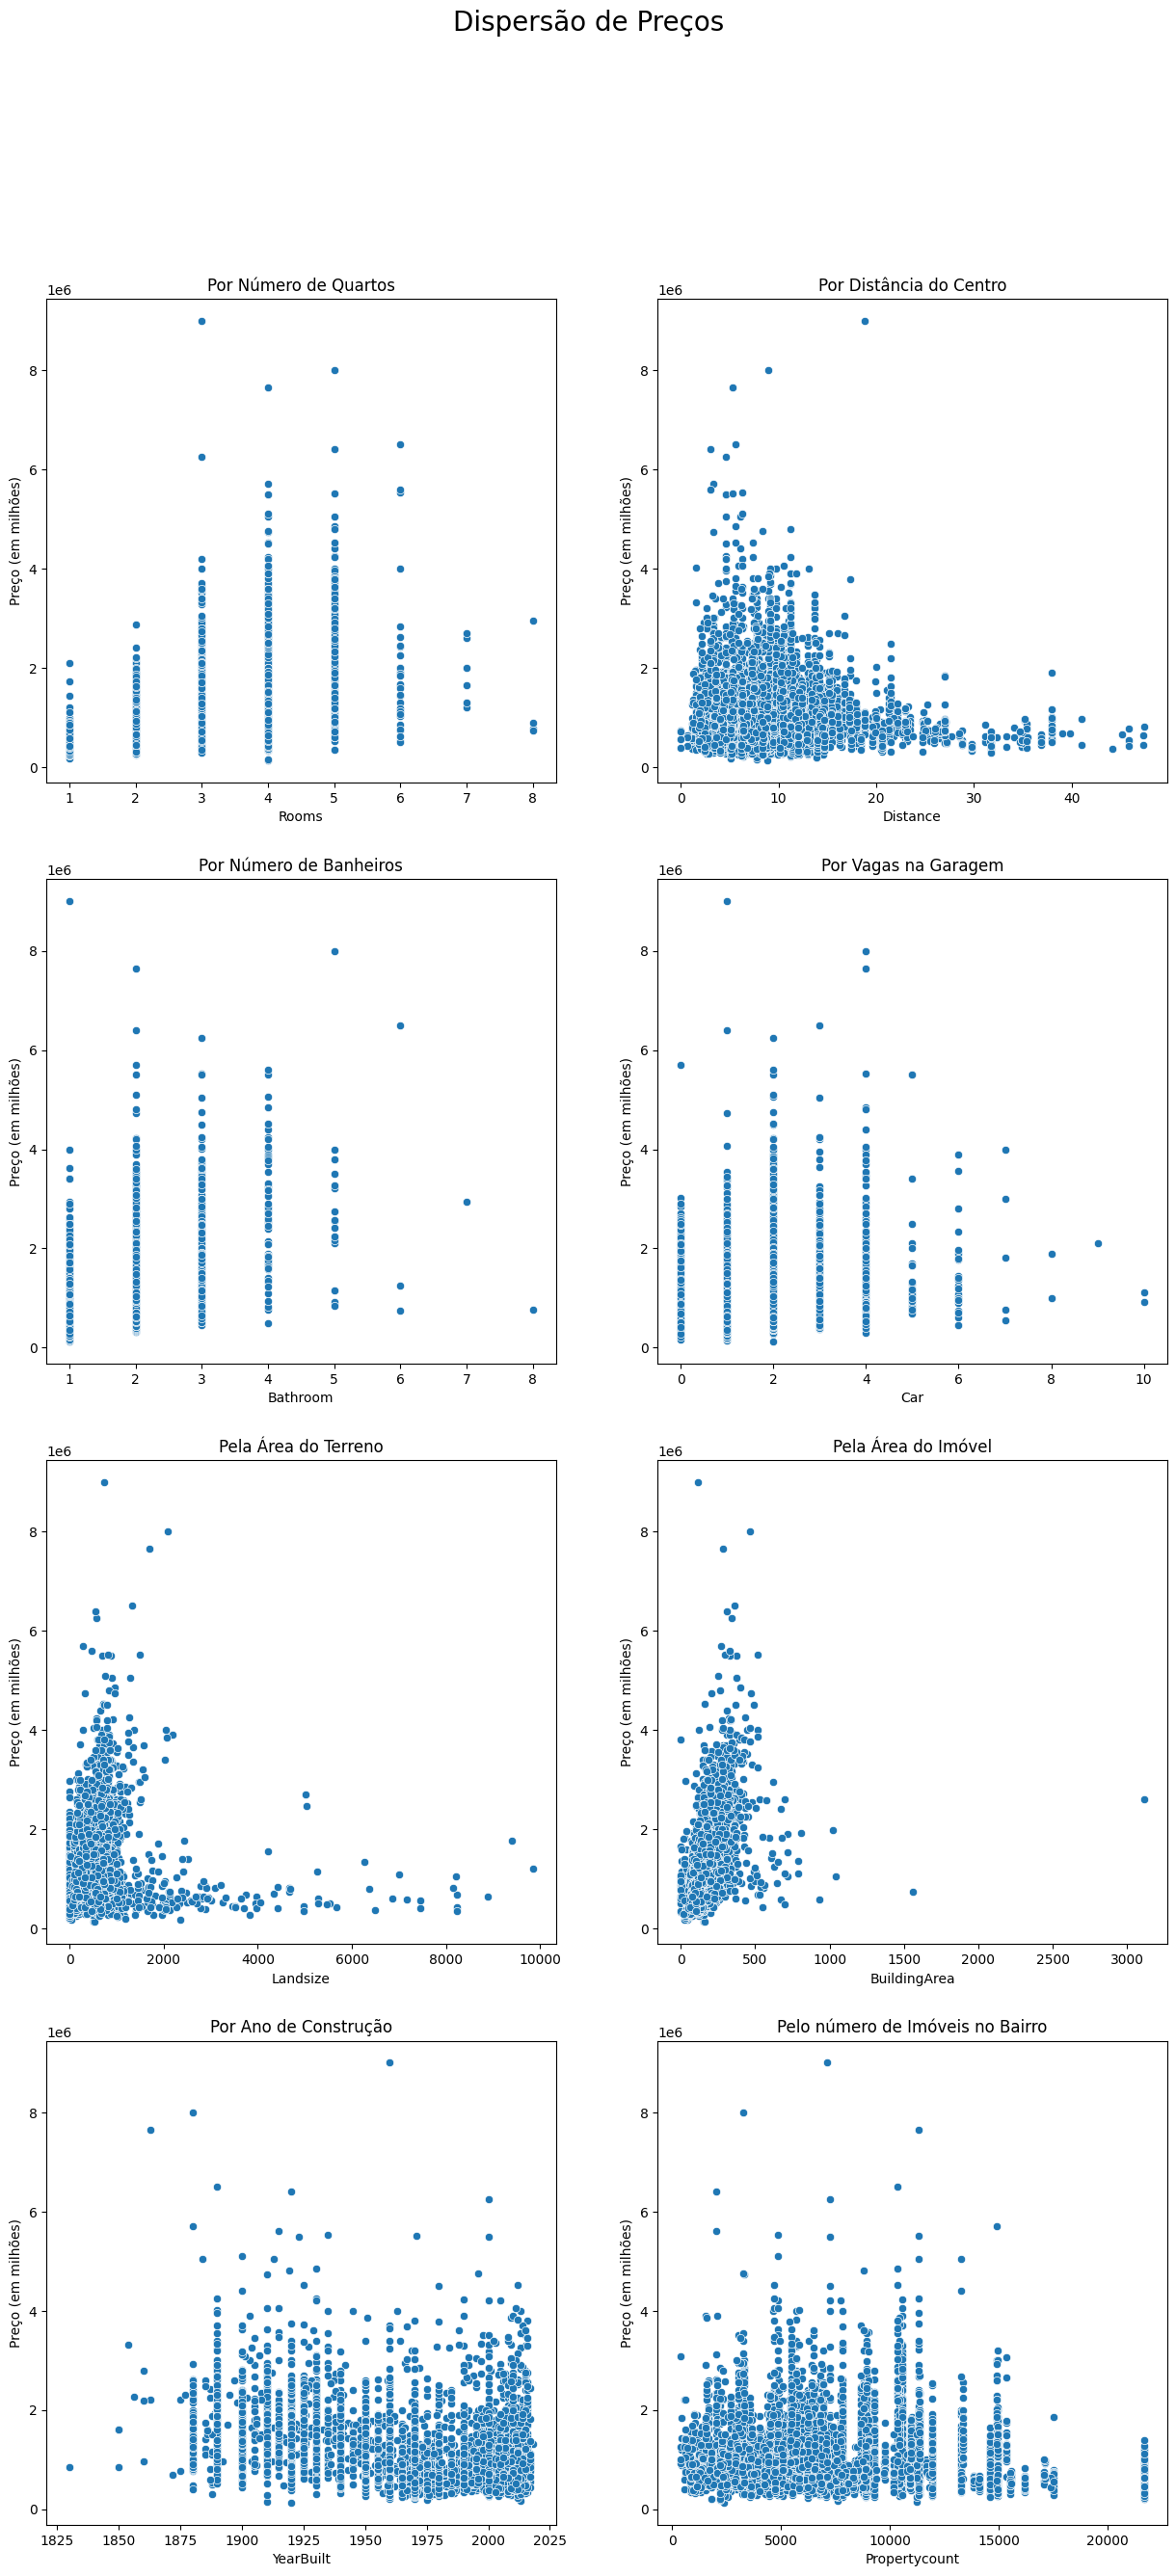

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(15,30))

sns.scatterplot(data=melb, x='Rooms', y='Price', ax=axes[0,0])
axes[0,0].set_ylabel('Preço (em milhões)')
axes[0,0].set_title('Por Número de Quartos')

sns.scatterplot(data=melb, x='Distance', y='Price', ax=axes[0,1])
axes[0,1].set_ylabel('Preço (em milhões)')
axes[0,1].set_title('Por Distância do Centro')

sns.scatterplot(data=melb, x='Bathroom', y='Price', ax=axes[1,0])
axes[1,0].set_ylabel('Preço (em milhões)')
axes[1,0].set_title('Por Número de Banheiros')

sns.scatterplot(data=melb, x='Car', y='Price', ax=axes[1,1])
axes[1,1].set_ylabel('Preço (em milhões)')
axes[1,1].set_title('Por Vagas na Garagem')

sns.scatterplot(data=melb, x='Landsize', y='Price', ax=axes[2,0])
axes[2,0].set_ylabel('Preço (em milhões)')
axes[2,0].set_title('Pela Área do Terreno')

sns.scatterplot(data=melb, x='BuildingArea', y='Price', ax=axes[2,1])
axes[2,1].set_ylabel('Preço (em milhões)')
axes[2,1].set_title('Pela Área do Imóvel')

sns.scatterplot(data=melb, x='YearBuilt', y='Price', ax=axes[3,0])
axes[3,0].set_ylabel('Preço (em milhões)')
axes[3,0].set_title('Por Ano de Construção')

sns.scatterplot(data=melb, x='Propertycount', y='Price', ax=axes[3,1])
axes[3,1].set_ylabel('Preço (em milhões)')
axes[3,1].set_title('Pelo número de Imóveis no Bairro')

fig.suptitle('Dispersão de Preços', fontsize=20)
plt.tight_layout
plt.show()

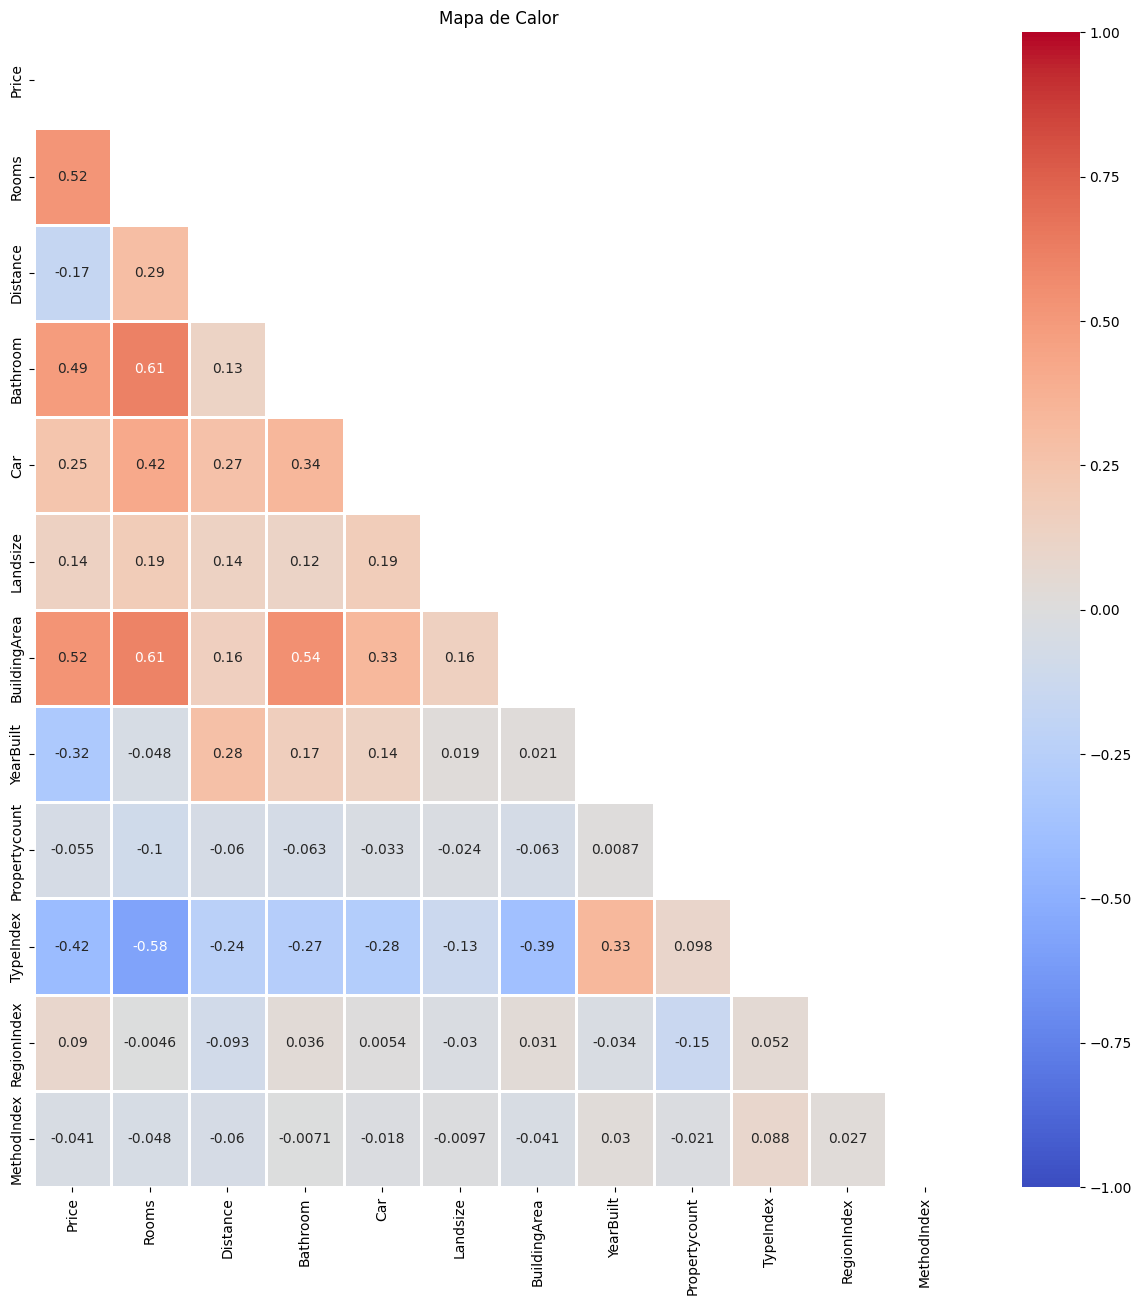

In [ ]:
melb_heat = melb[['Price', 'Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 
            'BuildingArea', 'YearBuilt', 'Propertycount', 'TypeIndex', 'RegionIndex', 'MethodIndex']]

plt.figure(figsize=(15,15))
mask = np.triu(melb_heat.corr())
sns.heatmap(melb_heat.corr(), cmap = 'coolwarm', annot=True, vmax=1, vmin=-1, mask=mask, linewidths=1)

plt.title('Mapa de Calor')
plt.show()

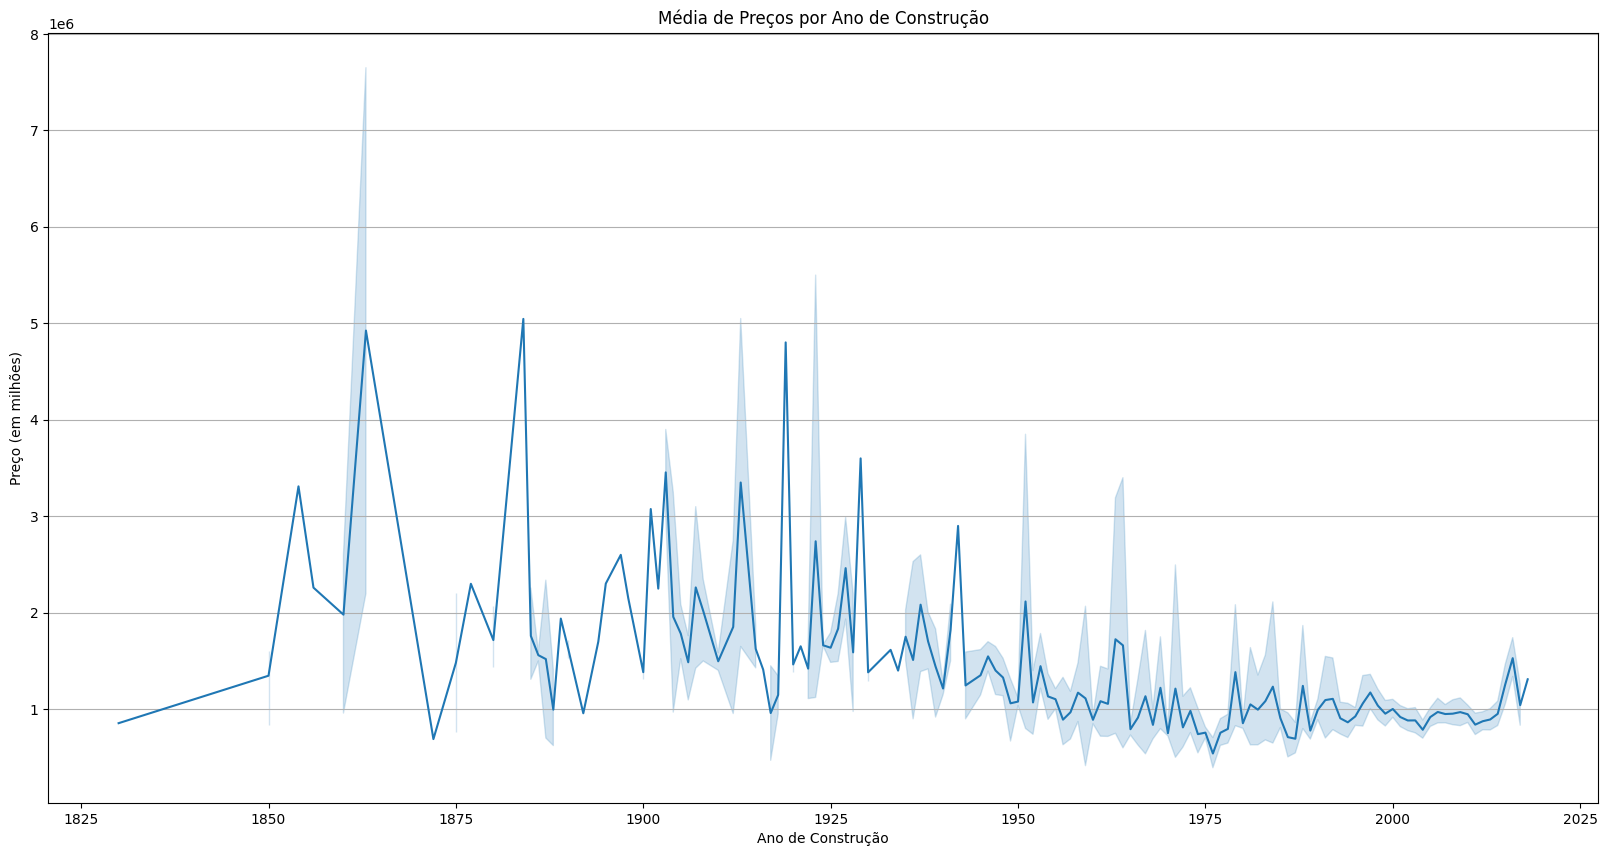

In [ ]:
plt.figure(figsize=(20,10))
sns.lineplot(data=melb, x='YearBuilt', y='Price')

plt.title('Média de Preços por Ano de Construção')
plt.xlabel('Ano de Construção')
plt.ylabel('Preço (em milhões)')
plt.grid(axis='y')

plt.show()

# Regressão Linear

Vamos enfim ao modelo de regressão linear.

## Separando os atributos

Primeiro separamos nossas "features" da variável "target".

In [ ]:
X = melb[['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 
            'BuildingArea', 'YearBuilt', 'Propertycount', 'RegionIndex', 'TypeIndex', 'MethodIndex']]
        
y = melb['Price']

## Modelo

Usando o Scikit-learn, podemos dividir de maneira procedural nossos dados entre bases de treino e de teste.

Inicialmente, usaremos uma divisão de 70% para treino e 30% para teste. Ao final do trabalho, faremos mais testes com outras divisões.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Importamos a biblioteca de regressão linear, que será modelada com as bases de treino de features e a de target.

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

Por fim, criamos uma nova lista com as previsões do modelo em cima da base de teste que contém somente as variáveis independentes.

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
previsoes = X_test.copy()
previsoes['Price'] = y_test
previsoes['PredictedPrice'] = y_pred

previsoes = previsoes[['Price', 'PredictedPrice']].sort_index()

In [ ]:
previsoes

,Price,PredictedPrice
4,1600000.0,9.760283e+05
9,1097000.0,1.270900e+06
17,1176500.0,1.427563e+06
20,1330000.0,1.926155e+06
32,1290000.0,1.153560e+06
...,...,...
13548,605000.0,6.655043e+05
13560,1400000.0,1.936628e+06
13568,951000.0,1.206997e+06
13572,650000.0,3.431448e+05


## Avaliações

Ainda com o Scikit-learn, podemos avaliar os resultados do nosso modelo com diferentes métricas. Para esse projeto, nos importamos principalmente com o MAE, MSE e RMSE. De maneira geral para essas três métricas, quanto mais próximas de 0, melhores as avaliações.

• MAE — O erro médio absoluto irá pegar a distância absoluta da previsão para o valor original (ou seja, não importa se será positiva ou negativa) e depois fará a média entre esses erros.

Por exemplo, observamos as previsões de -150$, 200$ e 500$ para o valor original de 50$. As distâncias serão 200, 150 e 450, e o MAE será de aproximadamente 266$.

• MSE — Para alguns casos, o método acima pode não representar corretamente erros de diferentes grandezas, já que trata-se de uma média dos valores. Por isso, o erro quadrático médio irá calcular o quadrado da distância de cada previsão antes de fazer a média. Dessa forma, erros mais acentuados serão punidos numa proporção de acordo.

• RMSE — O método acima traz seus próprios desafios, entretanto. Já que estamos usando o quadrado dos erros, a unidade de medida também será representada nessa escala. No nosso caso dos imóveis, teríamos um MSE com unidade monetária ao quadrado (por exemplo, R$1.000,00²), o que não estaria dentro da realidade do problema. Por isso, a raiz do erro quadrático médio fará a raiz quadrada do MSE para trazer a métrica de volta para uma unidade de medida interpretável.

Com as medidas explicadas, é útil reforçar que um modelo com resultados melhores terá o MAE, MSE e RMSE o mais próximos de zero.

In [ ]:
from sklearn import metrics
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_pred))

print('MAE:', MAE)
print('MSE:', MSE)
print('RMSE:', RMSE)

# print('R² =', metrics.explained_variance_score(y_test,y_pred))
# print('Score =', reg.score(X_test, y_test))

MAE: 297381.7900318368
MSE: 186037512473.45395
RMSE: 431320.66084695497


In [ ]:
previsoes['MAE'] = MAE
previsoes['MSE'] = MSE
previsoes['RMSE'] = RMSE

previsoes.to_csv('melb_previsoes.csv')

# Streamlit

Usando a ferramenta Streamlit, vamos montar um aplicativo interativo para apresentar o projeto e avaliar alguns dos resultados produzidos.

Primeiro instalamos o Streamlit.

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.6/240.6 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.5/87.5 kB 7.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Not uninstalling protobuf at /shared-libs/python3.9/py/lib/python3.9/site-packages, outside environment /root/venv
    Can't uninstall 'protobuf'. No files were found to uninstall.
  Attempti

Salvamos a base finalizada em um arquivo separado, já que precisamos refazer o DataFrame em cada célula do Streamlit e porque faremos uma comparação entre a base original e a alterada.

In [ ]:
melb.to_csv('melb_final.csv', index=False)

In [ ]:
melb_final = pd.read_csv('melb_final.csv')

Agora começamos a escrever as páginas do aplicativo em si.

Usamos o comando "%%writefile" para criar os arquivos no formato ".py". Vale destacar que esse tipo de comando (cell magic) NECESSARIAMENTE devem estar na primeira linha da célula.

Para as outras páginas, as salvamos dentro de uma pasta "pages" e as ordenamos no formato "1_exemplo.py", "2_exemplo.py", etc.

In [ ]:
%%writefile Imóveis_em_Melbourne/Apresentação.py

# Importações
import streamlit as st
import pandas as pd

# Configuração e título
st.set_page_config(
    page_title='Apresentação - Imóveis em Melbourne'
)

st.title('Análise de Imóveis em Melbourne')

st.write('Vamos avaliar os preços de alguns imóveis na cidade de Melbourne, na Austrália.')
st.write('Usaremos visualizações para nos auxiliar nessas análises.')
st.write('Faremos ajustes e mudanças na base de dados, como limpar valores nulos ou duplicados.')
st.write('Ao final, montaremos um modelo de regressão linear multivariada para tentar prever os preços desses imóveis.')

st.write('Aqui está a base original de dados:')
melb = pd.read_csv('melb_data.csv')
st.write(melb)

Overwriting Imóveis_em_Melbourne/Apresentação.py


In [ ]:
%%writefile Imóveis_em_Melbourne/pages/1_Análises_e_Visualizações.py

# Importações
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

st.title('Análises e Visualizações')
melb = pd.read_csv('melb_final.csv')

# Gráfico 1
st.write('Primeiro, observamos a distribuição de preços dos imóveis analisados.')

graf_1 = plt.figure()
plt.hist(melb['Price'], bins=50)
plt.xlabel('Preço (em milhões)')
plt.axvline(np.mean(melb['Price']), color='red')
plt.axvline(np.median(melb['Price']), color='green')
plt.title('Distribuição de Preços dos Imóveis', fontsize=15)
st.pyplot(graf_1)



# Gráfico 2
st.write('')
st.write('')
st.write('')
st.write('Em sequência, estudamos a correlação entre as variáveis usadas no modelo.')

melb_heat = melb[['Price', 'Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 
            'BuildingArea', 'YearBuilt', 'Propertycount', 'TypeIndex', 'RegionIndex', 'MethodIndex']]
graf_2 = plt.figure(figsize=(15,15))
mask = np.triu(melb_heat.corr())
sns.heatmap(melb_heat.corr(), cmap = 'coolwarm', annot=True, vmax=1, vmin=-1, mask=mask, linewidths=1)
plt.title('Mapa de Calor', fontsize=20)
st.pyplot(graf_2)



# Gráfico 3
st.write('')
st.write('')
st.write('')
st.write('Para cada variável numérica, examinamos as dispersões ao comparar com os preços.')

graf_3, axes = plt.subplots(4, 2, figsize=(15,30))
sns.scatterplot(data=melb, x='Rooms', y='Price', ax=axes[0,0])
axes[0,0].set_ylabel('Preço (em milhões)')
axes[0,0].set_title('Por Número de Quartos')
sns.scatterplot(data=melb, x='Distance', y='Price', ax=axes[0,1])
axes[0,1].set_ylabel('Preço (em milhões)')
axes[0,1].set_title('Por Distância do Centro')
sns.scatterplot(data=melb, x='Bathroom', y='Price', ax=axes[1,0])
axes[1,0].set_ylabel('Preço (em milhões)')
axes[1,0].set_title('Por Número de Banheiros')
sns.scatterplot(data=melb, x='Car', y='Price', ax=axes[1,1])
axes[1,1].set_ylabel('Preço (em milhões)')
axes[1,1].set_title('Por Vagas na Garagem')
sns.scatterplot(data=melb, x='Landsize', y='Price', ax=axes[2,0])
axes[2,0].set_ylabel('Preço (em milhões)')
axes[2,0].set_title('Pela Área do Terreno')
sns.scatterplot(data=melb, x='BuildingArea', y='Price', ax=axes[2,1])
axes[2,1].set_ylabel('Preço (em milhões)')
axes[2,1].set_title('Pela Área do Imóvel')
sns.scatterplot(data=melb, x='YearBuilt', y='Price', ax=axes[3,0])
axes[3,0].set_ylabel('Preço (em milhões)')
axes[3,0].set_title('Por Ano de Construção')
sns.scatterplot(data=melb, x='Propertycount', y='Price', ax=axes[3,1])
axes[3,1].set_ylabel('Preço (em milhões)')
axes[3,1].set_title('Pelo número de Imóveis no Bairro')
graf_3.suptitle('Dispersão de Preços', fontsize=20)
st.pyplot(graf_3)



# Gráfico 4
st.write('')
st.write('')
st.write('')
st.write('Por último, investigamos as distribuições de preço para as variáveis categóricas.')

graf_4, axes = plt.subplots(2, 2, figsize=(15,15))
sns.boxplot(data=melb, x='Type', y='Price', ax=axes[0,0])
axes[0,0].set_xlabel('Tipo de Imóvel')
axes[0,0].set_ylabel('Preço (em milhões)')
axes[0,0].set_title('Por Tipo de Imóvel')
sns.boxplot(data=melb, x='Regionname', y='Price', ax=axes[0,1])
axes[0,1].set_xlabel('Região')
axes[0,1].set_ylabel('Preço (em milhões)')
axes[0,1].set_title('Por Região')
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=90)
sns.boxplot(data=melb, x='Method', y='Price', ax=axes[1,0])
axes[1,0].set_xlabel('Método de Venda')
axes[1,0].set_ylabel('Preço (em milhões)')
axes[1,0].set_title('Por Método de Venda')
graf_4.delaxes(axes[1,1])
graf_4.suptitle('Distribuições de Preço nas Variáveis Categóricas', fontsize=20)
st.pyplot(graf_4)

Overwriting Imóveis_em_Melbourne/pages/1_Análises_e_Visualizações.py


In [ ]:
%%writefile Imóveis_em_Melbourne/pages/2_Alterações_na_Base_de_Dados.py

# Importações
import streamlit as st
import pandas as pd

st.title('Alterações na Base de Dados')

melb_bruto = pd.read_csv('melb_data.csv')
melb_final = pd.read_csv('melb_final.csv')

st.write('Vamos apresentar algumas mudanças que realizamos na base de dados.')



# Valores nulos
st.write('Eliminamos valores nulos.')
col_nulos_bruto, col_nulos_final = st.columns(2)
with col_nulos_bruto:
    st.write('Base original:')
    st.write(melb_bruto.isna().sum().sort_values(ascending=False))
with col_nulos_final:
    st.write('Base alterada:')
    st.write(melb_final.isna().sum())



# Valores discrepantes
st.write('Avaliamos que alguns dados não se encaixavam com a realidade do problema.')
col_anos, col_area = st.columns(2)
with col_anos:
    st.write('Encontramos um imóvel construído no ano de 1196.')
    st.write(melb_bruto[['YearBuilt', 'Price']][melb_bruto['YearBuilt'] < 1800])
with col_area:
    st.write('E vários imóveis registrados com 0 m², embora tivessem 2 ou mais quartos.')
    st.write(melb_bruto[['BuildingArea', 'Rooms', 'Bathroom', 'Car']][melb_bruto['BuildingArea'] == 0])



# LabelEncoder
st.write('Convertemos algumas variáveis categóricas que consideramos pertinentes para o modelo em índices numéricos.')
st.write(melb_final[['Type', 'TypeIndex', 'Regionname', 'RegionIndex']])

Overwriting Imóveis_em_Melbourne/pages/2_Alterações_na_Base_de_Dados.py


In [ ]:
%%writefile Imóveis_em_Melbourne/pages/3_Regressão_Linear.py

import streamlit as st
import pandas as pd


st.title('Regressão Linear')
st.write('Na etapa final do projeto, montamos nosso modelo de regressão linear.')
st.write('Separamos a variável alvo (preço) e usamos as demais variáveis para tentar prever os preços dos imóveis.')

melb_previsoes = pd.read_csv('melb_previsoes.csv')
melb_previsoes[['Price', 'PredictedPrice']]

st.write('')
st.write('')
st.write('Podemos avaliar o modelo com as seguintes métricas:')
st.write('MAE (Erro Médio Absoluto) = ', melb_previsoes.iloc[0]['MAE'])
st.write('MSE (Erro Quadrático Médio) = ', melb_previsoes.iloc[0]['MSE'])
st.write('RMSE (Raiz do Erro Quadrático Médio) = ', melb_previsoes.iloc[0]['RMSE'])

Overwriting Imóveis_em_Melbourne/pages/3_Regressão_Linear.py


Quando terminarmos de montar o aplicativo, usamos o comando abaixo para manter o programa rodando.

No menu lateral aqui no projeto do Deepnote, abrimos as configurações, permitimos conexões externas ("Allow incoming connections") e usamos o link indicado para nos conectarmos a aplicação.

In [ ]:
!streamlit run Imóveis_em_Melbourne/Apresentação.py --server.port=8080 --browser.serverAddress='0.0.0.0'




  You can now view your Streamlit app in your browser.

  URL: http://0.0.0.0:8080

^C
  Stopping...


Subimos o projeto para o GitHub. Aqui estão os links para o repositório e para acessar o aplicativo do Streamlit diretamente:

https://github.com/R-Dottori/melb-prices/

https://melb-prices-hnkjt7rz9qkbawcc56ov4w.streamlit.app/

# Documentando os testes da Regressão Linear

## Execuções

In [ ]:
# X = melb[['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 
#             'BuildingArea', 'Propertycount', 'YearBuilt', 'RegionIndex', 'TypeIndex', 'MethodIndex']]

# y = melb['Price']

In [ ]:
# resultados = []
# metodo = 10
# divisao = 0.3

# for x in range(10):
#     dicionario = {}
#     from sklearn.model_selection import train_test_split
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=divisao)

#     from sklearn.linear_model import LinearRegression
#     regressor = LinearRegression()
#     regressor.fit(X_train, y_train)
#     y_pred = regressor.predict(X_test)

#     from sklearn import metrics
#     dicionario['Método'] = metodo
#     dicionario['Teste'] = x + 1
#     dicionario['MAE'] = metrics.mean_absolute_error(y_test,y_pred)
#     dicionario['MSE'] = metrics.mean_squared_error(y_test,y_pred)
#     dicionario['RMSE'] = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
#     dicionario['R²']= metrics.explained_variance_score(y_test,y_pred)
#     dicionario['Score'] = regressor.score(X_test, y_test)

#     resultados.append(dicionario)

# # df_resultados = pd.DataFrame()
# df_temporario = pd.DataFrame(resultados)
# df_resultados = pd.concat([df_resultados, df_temporario])

## Salvar resultados

In [ ]:
# df_resultados.to_csv('melb_resultados.csv', index=False)

## Carregar resultados

In [ ]:
df_resultados = pd.read_csv('melb_resultados.csv')

## Comparações

In [ ]:
df_resultados

,Método,Teste,MAE,MSE,RMSE,R²,Score
0,1,1,292260.189301,2.129137e+11,461425.678626,0.502862,0.502474
1,1,2,302112.538914,1.914792e+11,437583.404208,0.555624,0.555570
2,1,3,298461.766981,1.995039e+11,446658.589555,0.545271,0.545204
3,1,4,295138.901627,1.948069e+11,441369.366256,0.549458,0.548869
4,1,5,294840.629362,2.216095e+11,470754.230835,0.497864,0.497801
...,...,...,...,...,...,...,...
95,10,6,293385.066496,2.008555e+11,448169.020685,0.558965,0.558634
96,10,7,294502.726191,1.882988e+11,433934.100523,0.555675,0.555673
97,10,8,292714.016715,1.690436e+11,411149.136089,0.552525,0.548163
98,10,9,298216.852960,2.170243e+11,465858.634976,0.527221,0.526646


In [ ]:
df_resultados.groupby('Método').mean()

,Teste,MAE,MSE,RMSE,R²,Score
Método,,,,,,
1,5.5,297110.577970,2.127233e+11,460947.466439,0.518452,0.518210
2,5.5,299789.116775,2.150549e+11,462423.400148,0.540803,0.540060
3,5.5,295684.126206,1.993638e+11,446103.881965,0.547829,0.547511
4,5.5,299575.110866,2.166546e+11,464876.180927,0.525640,0.525424
5,5.5,298170.226048,2.105591e+11,457705.919303,0.512511,0.512008
6,5.5,299117.072097,2.122033e+11,460030.954507,0.533161,0.533020
7,5.5,295884.557850,2.118757e+11,459260.638715,0.535042,0.534806
8,5.5,301107.061968,2.119217e+11,459630.535001,0.529635,0.529198
9,5.5,297441.258385,2.197276e+11,468084.113767,0.526036,0.525716


In [ ]:
df_resultados.groupby('Método')[['R²', 'Score']].max()

,R²,Score
Método,,
1,0.555624,0.555570
2,0.594740,0.594679
3,0.571787,0.571777
4,0.596686,0.596662
5,0.592753,0.592019
6,0.562280,0.562280
7,0.583055,0.583055
8,0.591188,0.590810
9,0.569245,0.569088


In [ ]:
df_resultados.groupby('Método')[['MAE', 'MSE', 'RMSE']].min()

,MAE,MSE,RMSE
Método,,,
1,292260.189301,1.914792e+11,437583.404208
2,283183.996841,1.637678e+11,404682.321578
3,283158.471796,1.662870e+11,407783.055413
4,290261.434723,1.738708e+11,416978.132817
5,281818.916024,1.629088e+11,403619.661935
6,291221.768079,1.822568e+11,426915.426294
7,288898.962447,1.683784e+11,410339.399963
8,280549.350823,1.628402e+11,403534.638899
9,289628.129424,1.791275e+11,423234.627497


# Próximas Etapas

• Determinar importância de cada variável no modelo

• Testar mais possibilidades para a regressão linear

— Outros tratamentos de outliers em Landsize

— Outros tratamentos para valores faltantes em YearBuilt e BuildingArea

• Explorar a necessidade de escalar os dados (MinMax Scaler, Standard Scaler, etc.)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2c6baa98-47a6-4117-9192-bff03eb76124' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>